# Import Packages and Initialize BERT

In [178]:
from BertEmbeddings import BertEmbeddings
import pandas as pd
import numpy as np

In [179]:
bert_embeddings = BertEmbeddings(model_name = 'prajjwal1/bert-medium')

body_of_text = "why do we multiply the constant by 4?"

output = bert_embeddings([body_of_text])

In [180]:
print(output[0]['tokens'])

['why', 'do', 'we', 'multi', '##ply', 'the', 'constant', 'by', '4', '?']


# Sums all of the elements in a column of word embeddings

In [181]:
def sum_word_embeddings(embeddings):
    array = np.asarray(embeddings)
    return array.sum(axis=0)

# Import test data

In [182]:
posts_dataframe = pd.read_csv('comp426-Fall-2019_labeled.csv')
posts_dataframe

,Unnamed: 0,type,title,cleanedContent,tags,timeCreated,totalFollowUpPosts,category
0,0,['note'],Final Project Guidelines,Google Doc Important Dates: October 12th - ...,"['exam', 'instructor-note', 'pin', 'project']",2019-10-03T04:26:19Z,0,administration
1,1,['note'],SN 252 - Office Hours Room,"Hi all, We have been given the SN 252 confere...","['instructor-note', 'logistics', 'pin']",2019-09-13T13:55:10Z,0,coordination
2,2,['question'],isn&#39;t the project video due date are 4 pm?...,Couple days ago a instructor post said it will...,"['project', 'student']",2019-12-12T19:45:50Z,4,administration
3,3,['question'],One Gavel Email,"I only received one email from Gavel, is there...","['exam', 'student']",2019-12-12T19:03:12Z,2,coordination
4,4,['question'],project submission,Where do we submit the link to our final proje...,"['project', 'student']",2019-12-12T15:27:01Z,1,administration
...,...,...,...,...,...,...,...,...
1023,1023,['question'],First Class,I didn't attend the first class due to sicknes...,"['other', 'student', 'unanswered']",2019-08-21T21:33:28Z,2,informational
1024,1024,['question'],Docker vs. Browsersync,Just curious if we can use a docker container ...,"['hw1', 'student']",2019-08-21T21:18:26Z,2,assignments
1025,1025,['question'],Course Entry Code,Can someone let me know what the course entry ...,"['other', 'student']",2019-08-21T13:24:41Z,1,administration
1026,1026,['question'],a00 4.2 Unexpected Token,In a00 4.2 when I run the command npm run subm...,"['hw1', 'student']",2019-08-21T01:53:45Z,7,clarification


In [183]:
# Remove superfluous frames from dataframe.
if "thread_id" in posts_dataframe:
    posts_dataframe = posts_dataframe.drop("thread_id", axis=1)
if "logistic_post" in posts_dataframe:
    posts_dataframe = posts_dataframe.drop("logistic_post", axis=1)
posts_dataframe = posts_dataframe.drop('Unnamed: 0', axis=1)
posts_dataframe = posts_dataframe.drop('type', axis=1)
posts_dataframe = posts_dataframe.drop('title', axis=1)
posts_dataframe = posts_dataframe.drop('tags', axis=1)
posts_dataframe = posts_dataframe.drop('timeCreated', axis=1)
posts_dataframe = posts_dataframe.drop('totalFollowUpPosts', axis=1)
if "logistics" in posts_dataframe:
    posts_dataframe = posts_dataframe.drop('logistics', axis=1)
posts_dataframe

,cleanedContent,category
0,Google Doc Important Dates: October 12th - ...,administration
1,"Hi all, We have been given the SN 252 confere...",coordination
2,Couple days ago a instructor post said it will...,administration
3,"I only received one email from Gavel, is there...",coordination
4,Where do we submit the link to our final proje...,administration
...,...,...
1023,I didn't attend the first class due to sicknes...,informational
1024,Just curious if we can use a docker container ...,assignments
1025,Can someone let me know what the course entry ...,administration
1026,In a00 4.2 when I run the command npm run subm...,clarification


# Remove weird characters

In [184]:
def remove_weird(content):    
    #remove bad characters
    cleanedContent = content.replace("\xa0", " ")   
    cleanedContent = content.replace("ï¿½", " ")
    cleanedContent = content.replace("&quot", " ")
    cleanedContent = content.replace("\xa0", " ")
    return cleanedContent

In [185]:
strings = list(posts_dataframe['cleanedContent'])
new_strings = []
for string in strings:
    string = remove_weird(string)
    new_strings.append(string)
posts_dataframe['cleanedContent'] = new_strings

# Process the data

In [186]:
# Specifically for COMP 426 Data to account for difference in Will's labels.
posts_dataframe.loc[posts_dataframe.category == "administation", "category"] = "administration"
posts_dataframe.loc[posts_dataframe.category == "administration ", "category"] = "administration"
posts_dataframe.loc[posts_dataframe.category == "personal coordination", "category"] = "coordination"
posts_dataframe.loc[posts_dataframe.category == "instructional", "category"] = "informational"
posts_dataframe.loc[posts_dataframe.category == "assignment", "category"] = "assignments"

In [187]:
posts_dataframe.loc[posts_dataframe.category == "informational", "logistic_post"] = 0
posts_dataframe.loc[posts_dataframe.category == "assignments", "logistic_post"] = 0
posts_dataframe.loc[posts_dataframe.category == "clarification", "logistic_post"] = 0
posts_dataframe.loc[posts_dataframe.category == "tools", "logistic_post"] = 0
posts_dataframe.loc[posts_dataframe.category == "administration", "logistic_post"] = 1
posts_dataframe.loc[posts_dataframe.category == "grades", "logistic_post"] = 1
posts_dataframe.loc[posts_dataframe.category == "coordination", "logistic_post"] = 1
posts_dataframe.loc[posts_dataframe.category == "instructions", "logistic_post"] = 1

In [188]:
posts_dataframe

,cleanedContent,category,logistic_post
0,Google Doc Important Dates: October 12th - ...,administration,1.0
1,"Hi all, We have been given the SN 252 confere...",coordination,NaN
2,Couple days ago a instructor post said it will...,administration,1.0
3,"I only received one email from Gavel, is there...",coordination,NaN
4,Where do we submit the link to our final proje...,administration,1.0
...,...,...,...
1023,I didn't attend the first class due to sicknes...,informational,0.0
1024,Just curious if we can use a docker container ...,assignments,0.0
1025,Can someone let me know what the course entry ...,administration,1.0
1026,In a00 4.2 when I run the command npm run subm...,clarification,0.0


# Getting BERT Embeddings from one post

In [189]:
def single_post_processing(post):
    word = []
    embedding = []
    summed_embedding = []
    try:
        result = bert_embeddings([post])        
        word = result[0]['tokens']
        #word = np.array(word)
        for key in result[0]['embeddings_map'].keys():
            embedding.append(np.array(result[0]['embeddings_map'][key]))
        #embedding = np.array(embedding)
        summed_embedding = list(np.sum(embedding, axis = 0))
        return word, embedding, summed_embedding
    except:
        #word = np.array(word)
        #embedding = np.array(embedding)
        #summed_embedding = np.array(summed_embedding)
        return word, embedding, summed_embedding

# Getting BERT embeddings on all posts

In [190]:
for i in range(0, len(posts_dataframe)):
    if pd.isnull(posts_dataframe['cleanedContent'].iloc[i]):
        print(i)

In [191]:
words = []
embeddings = []
summed_embeddings = []
problem_index = []
all_posts = posts_dataframe['cleanedContent'].tolist()
for i in range(0, len(all_posts)):
    print("Processing the " + str(i + 1) + " th post...")
    word, embedding, summed_embedding = single_post_processing(all_posts[i])
    if (len(word) == 0 and len(embedding) == 0 and len(summed_embedding) == 0):
        problem_index.append(i)
    words.append(word)
    embeddings.append(embedding)
    summed_embeddings.append(summed_embedding)
#words = np.array(words)
#embeddings = np.array(embeddings)
#summed_embeddings = np.array(summed_embeddings)
#problem_index = np.array(problem_index)


Processing the 1 th post...
Processing the 2 th post...
Processing the 3 th post...
Processing the 4 th post...
Processing the 5 th post...
Processing the 6 th post...
Processing the 7 th post...
Processing the 8 th post...
Processing the 9 th post...
Processing the 10 th post...
Processing the 11 th post...
Processing the 12 th post...
Processing the 13 th post...
Processing the 14 th post...
Processing the 15 th post...
Processing the 16 th post...
Processing the 17 th post...
Processing the 18 th post...
Processing the 19 th post...
Processing the 20 th post...
Processing the 21 th post...
Processing the 22 th post...
Processing the 23 th post...
Processing the 24 th post...
Processing the 25 th post...
Processing the 26 th post...
Processing the 27 th post...
Processing the 28 th post...
Processing the 29 th post...
Processing the 30 th post...
Processing the 31 th post...
Processing the 32 th post...
Processing the 33 th post...
Processing the 34 th post...
Processing the 35 th po

Processing the 550 th post...
Processing the 551 th post...
Processing the 552 th post...
Processing the 553 th post...
Processing the 554 th post...
Processing the 555 th post...
Processing the 556 th post...
Processing the 557 th post...
Processing the 558 th post...
Processing the 559 th post...
Processing the 560 th post...
Processing the 561 th post...
Processing the 562 th post...
Processing the 563 th post...
Processing the 564 th post...
Processing the 565 th post...
Processing the 566 th post...
Processing the 567 th post...
Processing the 568 th post...
Processing the 569 th post...
Processing the 570 th post...
Processing the 571 th post...
Processing the 572 th post...
Processing the 573 th post...
Processing the 574 th post...
Processing the 575 th post...
Processing the 576 th post...
Processing the 577 th post...
Processing the 578 th post...
Processing the 579 th post...
Processing the 580 th post...
Processing the 581 th post...
Processing the 582 th post...
Processing

Processing the 824 th post...
Processing the 825 th post...
Processing the 826 th post...
Processing the 827 th post...
Processing the 828 th post...
Processing the 829 th post...
Processing the 830 th post...
Processing the 831 th post...
Processing the 832 th post...
Processing the 833 th post...
Processing the 834 th post...
Processing the 835 th post...
Processing the 836 th post...
Processing the 837 th post...
Processing the 838 th post...
Processing the 839 th post...
Processing the 840 th post...
Processing the 841 th post...
Processing the 842 th post...
Processing the 843 th post...
Processing the 844 th post...
Processing the 845 th post...
Processing the 846 th post...
Processing the 847 th post...
Processing the 848 th post...
Processing the 849 th post...
Processing the 850 th post...
Processing the 851 th post...
Processing the 852 th post...
Processing the 853 th post...
Processing the 854 th post...
Processing the 855 th post...
Processing the 856 th post...
Processing

In [192]:
print(problem_index)

[358, 624, 634, 635, 678, 703]


In [193]:
posts_dataframe['words'] = words
posts_dataframe['embeddings'] = embeddings
posts_dataframe['summed_embeddings'] = summed_embeddings

In [211]:
posts_dataframe

,cleanedContent,category,logistic_post,words,embeddings,summed_embeddings
0,Google Doc Important Dates: October 12th - ...,administration,1.0,"[google, doc, important, dates, :, october, 12...","[[-0.88909143, -0.06505157, 1.1979227, 0.00465...","[-14.674725, 22.225445, 19.031178, 11.954818, ..."
1,"Hi all, We have been given the SN 252 confere...",coordination,NaN,"[hi, all, ,, we, have, been, given, the, s, ##...","[[-0.46614397, -0.22647974, 0.87992674, 0.7477...","[-46.528587, 65.42013, 10.126462, 40.94394, -3..."
2,Couple days ago a instructor post said it will...,administration,1.0,"[couple, days, ago, a, instructor, post, said,...","[[-0.20466758, 0.8611513, 0.66301364, -0.00503...","[0.42792925, 11.538098, 1.1648655, -3.3876092,..."
3,"I only received one email from Gavel, is there...",coordination,NaN,"[i, only, received, one, email, from, gave, ##...","[[-0.17703265, 0.573038, 1.214854, 0.49866226,...","[-9.021246, 11.115723, 13.547983, -0.09546614,..."
4,Where do we submit the link to our final proje...,administration,1.0,"[where, do, we, submit, the, link, to, our, fi...","[[-0.65252537, 0.15380545, 1.0095474, -0.07210...","[-22.765516, 24.385792, 16.616133, 4.534482, 1..."
...,...,...,...,...,...,...
1023,I didn't attend the first class due to sicknes...,informational,0.0,"[i, didn, ', t, attend, the, first, class, due...","[[-0.29144034, 0.28764883, 0.6571198, 0.123631...","[-29.250492, 14.122214, 16.124138, -6.7804165,..."
1024,Just curious if we can use a docker container ...,assignments,0.0,"[just, curious, if, we, can, use, a, dock, ##e...","[[-0.51707613, 0.10460524, 0.66597325, 0.80311...","[-16.413177, 26.512978, 5.8439584, 6.942077, -..."
1025,Can someone let me know what the course entry ...,administration,1.0,"[can, someone, let, me, know, what, the, cours...","[[-0.16714315, -0.048781455, 0.37909323, 0.493...","[-9.016863, 1.1918954, 2.870181, 2.141528, 8.1..."
1026,In a00 4.2 when I run the command npm run subm...,clarification,0.0,"[in, a, ##00, 4, ., 2, when, i, run, the, comm...","[[0.020257033, 0.09196691, 0.8564111, 0.210098...","[-26.857716, 34.160805, 28.73124, 20.790276, -..."


# Turn Summed Embeddings into Features

In [236]:
sum_dataframe = pd.DataFrame(summed_embeddings)
frames = [another_dataframe, sum_dataframe]
features = pd.concat(frames, axis=1)
features = features.drop("cleanedContent", axis=1)
features = features.drop("words", axis=1)
features = features.drop("embeddings", axis=1)
features = features.drop("summed_embeddings", axis=1)
features

,category,logistic_post,0,1,2,3,4,5,6,7,...,1526,1527,1528,1529,1530,1531,1532,1533,1534,1535
0,administration,1.0,-14.674725,22.225445,19.031178,11.954818,-15.649882,0.673442,-9.972866,0.664614,...,1.125555,9.058460,31.610374,22.210222,-25.953777,-18.959753,0.043026,-8.252907,17.048365,-1.988921
1,coordination,NaN,-46.528587,65.420128,10.126462,40.943939,-35.075077,24.400286,-4.330191,8.124983,...,9.542748,40.799068,4.093179,19.162710,-16.904160,-49.388184,-15.001996,6.853788,87.192230,9.480095
2,administration,1.0,0.427929,11.538098,1.164865,-3.387609,-2.897171,7.496603,6.942996,0.700416,...,-12.398408,2.565244,12.537310,2.134207,-4.730854,-11.548869,-0.897522,-2.896992,8.476423,-7.486757
3,coordination,NaN,-9.021246,11.115723,13.547983,-0.095466,4.404020,16.082968,-3.501638,4.059286,...,5.624410,0.537631,-4.096742,6.366859,5.786204,-13.742605,-5.836160,-9.002473,8.145980,0.407921
4,administration,1.0,-22.765516,24.385792,16.616133,4.534482,10.499657,30.441860,-3.001232,5.627488,...,0.527906,20.374409,-2.180564,8.402516,10.017317,-13.798285,-7.649799,13.012163,21.646366,-12.947659
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1023,informational,0.0,-29.250492,14.122214,16.124138,-6.780416,-5.868410,21.164118,-8.708423,6.468476,...,15.599506,21.517584,-0.430936,17.484306,-10.106223,-18.657497,7.783154,9.693931,21.642097,27.869949
1024,assignments,0.0,-16.413177,26.512978,5.843958,6.942077,-5.127940,15.618570,-0.432835,10.326545,...,-13.795955,8.823999,-1.229673,2.663264,7.139060,-7.262760,-3.398654,3.221743,0.676880,-9.367546
1025,administration,1.0,-9.016863,1.191895,2.870181,2.141528,8.170994,10.342067,-1.524702,-3.252542,...,5.313470,9.552217,3.338246,1.689629,-5.099435,-19.998604,-11.550188,-3.653310,18.769178,5.240550
1026,clarification,0.0,-26.857716,34.160805,28.731239,20.790276,-12.836514,30.567448,-12.395011,-4.529248,...,16.541031,53.879417,1.443165,8.111151,-7.426194,-57.845413,-15.947176,5.273110,27.126156,3.255051


In [237]:
features.loc[np.isnan(features.logistic_post)]

,category,logistic_post,0,1,2,3,4,5,6,7,...,1526,1527,1528,1529,1530,1531,1532,1533,1534,1535
1,coordination,NaN,-46.528587,65.420128,10.126462,40.943939,-35.075077,24.400286,-4.330191,8.124983,...,9.542748,40.799068,4.093179,19.162710,-16.904160,-49.388184,-15.001996,6.853788,87.192230,9.480095
3,coordination,NaN,-9.021246,11.115723,13.547983,-0.095466,4.404020,16.082968,-3.501638,4.059286,...,5.624410,0.537631,-4.096742,6.366859,5.786204,-13.742605,-5.836160,-9.002473,8.145980,0.407921
36,coordination,NaN,-19.758806,11.533505,10.452376,17.297850,7.959708,17.464354,-11.830921,6.369491,...,-2.581662,13.194481,0.754643,21.492943,-3.658429,-24.468206,-3.271528,-0.289681,14.918478,4.208242
46,coordination,NaN,-32.782837,31.760775,0.888490,12.125797,-1.637795,19.685396,-22.948383,-5.568693,...,0.856477,29.681795,-3.552586,31.091061,11.568735,-39.995129,-9.806519,15.537179,12.532215,-5.209955
73,coordination,NaN,-33.854416,10.587951,15.009062,2.243045,4.004177,10.055449,-5.709772,-2.742198,...,6.625842,16.252695,21.765951,-0.873056,-12.258428,12.010712,-8.191883,-49.929890,29.259298,-29.643314
79,coordination,NaN,-0.460449,2.618095,2.796837,-9.024629,5.258920,2.942497,-6.056268,6.076446,...,-1.106858,12.415253,-12.226663,-3.141595,-6.422754,-5.796465,-4.123624,-8.348225,1.246538,7.916787
82,coordination,NaN,-3.801342,7.909412,8.799998,4.496565,0.207246,6.261306,1.489050,-2.917080,...,4.774965,6.838816,6.595612,-8.844722,5.316846,-9.396373,-5.469828,0.037096,12.093842,-0.982784
88,coordination,NaN,-7.377417,6.851152,4.509868,-3.826215,-3.106357,4.206090,6.748629,1.799096,...,-4.338284,-6.708533,-3.478462,-4.902398,-5.622042,-11.978778,-3.558657,5.877868,12.511343,-7.984372
101,coordination,NaN,-95.412842,109.461464,91.832664,-36.966843,67.887115,1.372904,-70.841660,24.802082,...,4.684602,80.660843,-14.041472,24.823553,-75.410637,-87.057510,-4.715750,-65.276733,91.731163,51.454899
103,coordination,NaN,-28.905899,39.444721,8.590425,-14.136858,11.227450,3.148693,-21.087881,1.385528,...,-7.775392,50.951378,-0.812699,40.980217,-31.570536,-10.222866,-0.603772,-36.430965,20.687128,-1.581462


In [238]:
features.loc[features.category == "informational", "logistic_post"] = 0
features.loc[features.category == "assignments", "logistic_post"] = 0
features.loc[features.category == "clarification", "logistic_post"] = 0
features.loc[features.category == "tools", "logistic_post"] = 0
features.loc[features.category == "administration ", "logistic_post"] = 1
features.loc[features.category == "grades", "logistic_post"] = 1
features.loc[features.category == "coordination ", "logistic_post"] = 1
features.loc[features.category == "instructions", "logistic_post"] = 1
features.loc[features.category == "Instructions", "logistic_post"] = 1
features

,category,logistic_post,0,1,2,3,4,5,6,7,...,1526,1527,1528,1529,1530,1531,1532,1533,1534,1535
0,administration,1.0,-14.674725,22.225445,19.031178,11.954818,-15.649882,0.673442,-9.972866,0.664614,...,1.125555,9.058460,31.610374,22.210222,-25.953777,-18.959753,0.043026,-8.252907,17.048365,-1.988921
1,coordination,1.0,-46.528587,65.420128,10.126462,40.943939,-35.075077,24.400286,-4.330191,8.124983,...,9.542748,40.799068,4.093179,19.162710,-16.904160,-49.388184,-15.001996,6.853788,87.192230,9.480095
2,administration,1.0,0.427929,11.538098,1.164865,-3.387609,-2.897171,7.496603,6.942996,0.700416,...,-12.398408,2.565244,12.537310,2.134207,-4.730854,-11.548869,-0.897522,-2.896992,8.476423,-7.486757
3,coordination,1.0,-9.021246,11.115723,13.547983,-0.095466,4.404020,16.082968,-3.501638,4.059286,...,5.624410,0.537631,-4.096742,6.366859,5.786204,-13.742605,-5.836160,-9.002473,8.145980,0.407921
4,administration,1.0,-22.765516,24.385792,16.616133,4.534482,10.499657,30.441860,-3.001232,5.627488,...,0.527906,20.374409,-2.180564,8.402516,10.017317,-13.798285,-7.649799,13.012163,21.646366,-12.947659
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1023,informational,0.0,-29.250492,14.122214,16.124138,-6.780416,-5.868410,21.164118,-8.708423,6.468476,...,15.599506,21.517584,-0.430936,17.484306,-10.106223,-18.657497,7.783154,9.693931,21.642097,27.869949
1024,assignments,0.0,-16.413177,26.512978,5.843958,6.942077,-5.127940,15.618570,-0.432835,10.326545,...,-13.795955,8.823999,-1.229673,2.663264,7.139060,-7.262760,-3.398654,3.221743,0.676880,-9.367546
1025,administration,1.0,-9.016863,1.191895,2.870181,2.141528,8.170994,10.342067,-1.524702,-3.252542,...,5.313470,9.552217,3.338246,1.689629,-5.099435,-19.998604,-11.550188,-3.653310,18.769178,5.240550
1026,clarification,0.0,-26.857716,34.160805,28.731239,20.790276,-12.836514,30.567448,-12.395011,-4.529248,...,16.541031,53.879417,1.443165,8.111151,-7.426194,-57.845413,-15.947176,5.273110,27.126156,3.255051


In [239]:
features.loc[np.isnan(features.logistic_post)]

,category,logistic_post,0,1,2,3,4,5,6,7,...,1526,1527,1528,1529,1530,1531,1532,1533,1534,1535
358,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
624,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
634,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
635,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
678,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
703,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [240]:
features["logistic_post"].value_counts()

0.0    883
1.0    139
Name: logistic_post, dtype: int64

In [241]:
features = features.drop('category', axis=1)
features = features.drop(problem_index)
features

,logistic_post,0,1,2,3,4,5,6,7,8,...,1526,1527,1528,1529,1530,1531,1532,1533,1534,1535
0,1.0,-14.674725,22.225445,19.031178,11.954818,-15.649882,0.673442,-9.972866,0.664614,-12.956816,...,1.125555,9.058460,31.610374,22.210222,-25.953777,-18.959753,0.043026,-8.252907,17.048365,-1.988921
1,1.0,-46.528587,65.420128,10.126462,40.943939,-35.075077,24.400286,-4.330191,8.124983,24.040583,...,9.542748,40.799068,4.093179,19.162710,-16.904160,-49.388184,-15.001996,6.853788,87.192230,9.480095
2,1.0,0.427929,11.538098,1.164865,-3.387609,-2.897171,7.496603,6.942996,0.700416,-2.912369,...,-12.398408,2.565244,12.537310,2.134207,-4.730854,-11.548869,-0.897522,-2.896992,8.476423,-7.486757
3,1.0,-9.021246,11.115723,13.547983,-0.095466,4.404020,16.082968,-3.501638,4.059286,5.907721,...,5.624410,0.537631,-4.096742,6.366859,5.786204,-13.742605,-5.836160,-9.002473,8.145980,0.407921
4,1.0,-22.765516,24.385792,16.616133,4.534482,10.499657,30.441860,-3.001232,5.627488,1.698190,...,0.527906,20.374409,-2.180564,8.402516,10.017317,-13.798285,-7.649799,13.012163,21.646366,-12.947659
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1023,0.0,-29.250492,14.122214,16.124138,-6.780416,-5.868410,21.164118,-8.708423,6.468476,5.729406,...,15.599506,21.517584,-0.430936,17.484306,-10.106223,-18.657497,7.783154,9.693931,21.642097,27.869949
1024,0.0,-16.413177,26.512978,5.843958,6.942077,-5.127940,15.618570,-0.432835,10.326545,-0.264003,...,-13.795955,8.823999,-1.229673,2.663264,7.139060,-7.262760,-3.398654,3.221743,0.676880,-9.367546
1025,1.0,-9.016863,1.191895,2.870181,2.141528,8.170994,10.342067,-1.524702,-3.252542,-0.008688,...,5.313470,9.552217,3.338246,1.689629,-5.099435,-19.998604,-11.550188,-3.653310,18.769178,5.240550
1026,0.0,-26.857716,34.160805,28.731239,20.790276,-12.836514,30.567448,-12.395011,-4.529248,11.709856,...,16.541031,53.879417,1.443165,8.111151,-7.426194,-57.845413,-15.947176,5.273110,27.126156,3.255051


# Analyze the Data

In [242]:
features["logistic_post"].value_counts()

0.0    883
1.0    139
Name: logistic_post, dtype: int64

# Splitting into Test and Train

In [243]:
from sklearn.model_selection import train_test_split

outputs = features['logistic_post']
inputs = features.drop('logistic_post', axis=1)
x_train, x_test, y_train, y_test,  = train_test_split(inputs, outputs, test_size=0.25, random_state=411)

# Normalization

In [244]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import Normalizer

scaler = Normalizer() 

x_train_norm = x_train
x_test_norm = x_test

if scaler != None:
    scaler.fit(x_train)
    x_train_norm = scaler.transform(x_train)
    scaler.fit(x_test)
    x_test_norm = scaler.transform(x_test)

# Principal Component Analysis

In [258]:
from sklearn.decomposition import PCA

pca = PCA(n_components = 32)
pca.fit(x_train_norm)
x_train_pca = pca.transform(x_train_norm)
x_test_pca = pca.transform(x_test_norm)
pca.explained_variance_ratio_
cumsum = np.cumsum(pca.explained_variance_ratio_)
cumsum

array([0.13306525, 0.20072025, 0.24554812, 0.28422425, 0.3152245 ,
       0.34140371, 0.36317714, 0.38336625, 0.40202329, 0.41969877,
       0.43607835, 0.45209643, 0.46609654, 0.47920194, 0.49180851,
       0.50392883, 0.515541  , 0.52691624, 0.53743771, 0.54741304,
       0.55717633, 0.56674265, 0.57594696, 0.58487618, 0.59341934,
       0.60131052, 0.60901742, 0.61643969, 0.62375576, 0.63092536,
       0.63799473, 0.6446974 ])

# Random Forest Classifier

In [265]:
from sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier()
rfc.fit(x_train_pca, y_train)
y_predict = rfc.predict(x_test_pca)

from sklearn import metrics

print("Accuracy:",metrics.accuracy_score(y_test, y_predict))

Accuracy: 0.9140625


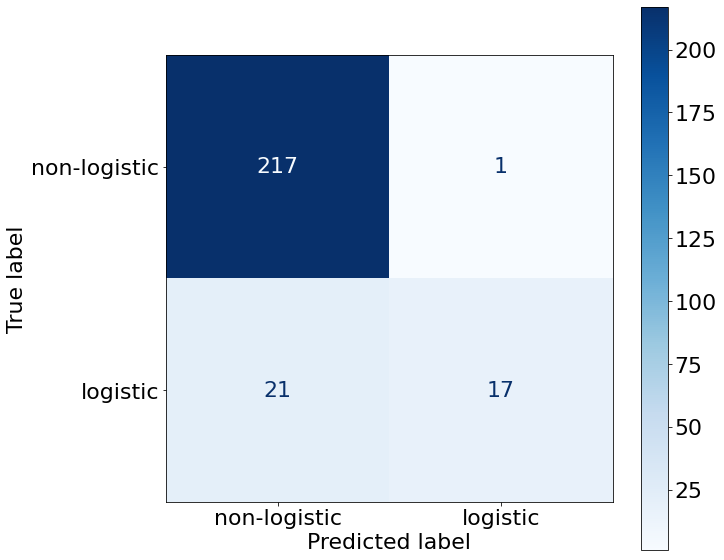

In [253]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix
import matplotlib.pyplot as plt

labels = ['non-logistic', 'logistic']

fig, ax = plt.subplots(figsize=(10, 10))

plt.rcParams.update({'font.size': 22})

matrix = plot_confusion_matrix(rfc, x_test_pca, y_test, cmap=plt.cm.Blues, ax=ax, values_format="")

ax.set_xticklabels(labels)
ax.set_yticklabels(labels)

plt.show()

In [267]:
accuracy = []
for i in range(1, 101):
    pca = PCA(n_components = i)
    pca.fit(x_train_norm)
    x_train_pca = pca.transform(x_train_norm)
    x_test_pca = pca.transform(x_test_norm)

    rfc = RandomForestClassifier()
    rfc.fit(x_train_pca, y_train)
    y_predict = rfc.predict(x_test_pca)
    accuracy.append(metrics.accuracy_score(y_test, y_predict))

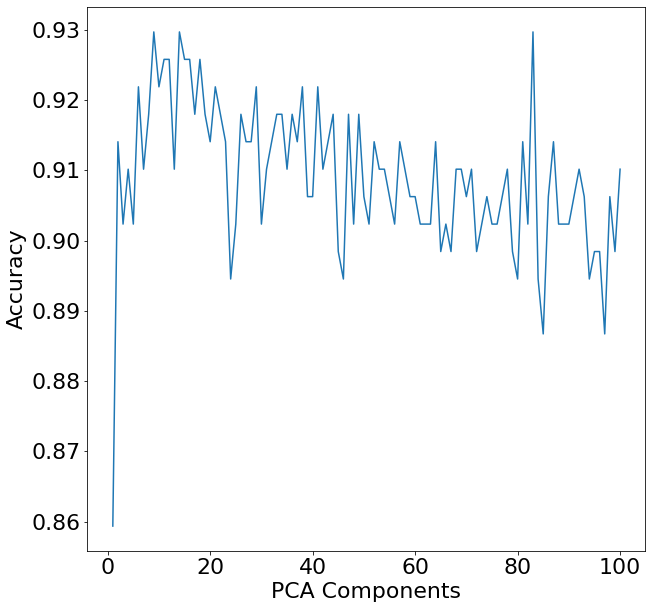

In [269]:
fig, ax = plt.subplots(figsize=(10, 10))
plt.plot(np.arange(1, 101), accuracy)
plt.xlabel("PCA Components")
plt.ylabel("Accuracy")
plt.show()

**The above plot shows that the accuracy almost has nothing to do with PCA and RFC, since the data is heavily biased, the algorithm just follow the probability when predicting tags.**

**What if we use unbiased data (logistic post == non-logistic post)?**

In [309]:
logistic_index = np.where(y_test == 1.0)[0]
non_logistic_index = np.where(y_test == 0.0)[0]

pca = PCA(n_components = 32)
pca.fit(x_train_norm)
x_train_pca = pca.transform(x_train_norm)
x_test_pca = pca.transform(x_test_norm)

rfc = RandomForestClassifier()
rfc.fit(x_train_pca, y_train)
y_predict = rfc.predict(x_test_pca)
print("Accuracy:",metrics.accuracy_score(y_test, y_predict))

new_test_data = []
for i in non_logistic_index:
    new_test_data.append(x_test_pca[i])
    if (len(new_test_data) == np.count_nonzero(y_test)):
        break
for i in logistic_index:
    new_test_data.append(x_test_pca[i])
    if (len(new_test_data) == 2 * np.count_nonzero(y_test)):
        break
new_test_data = np.array(new_test_data)

new_y_test = []
for i in range(0, np.count_nonzero(y_test)):
    new_y_test.append(0.0)
for i in range(0, np.count_nonzero(y_test)):
    new_y_test.append(1.0)
new_y_test = np.array(new_y_test)

Accuracy: 0.90625
(76,)


In [310]:
pca = PCA(n_components = 32)
pca.fit(x_train_norm)
x_train_pca = pca.transform(x_train_norm)

rfc = RandomForestClassifier()
rfc.fit(x_train_pca, y_train)
y_predict = rfc.predict(new_test_data)
print("Accuracy:",metrics.accuracy_score(new_y_test, y_predict))

Accuracy: 0.7105263157894737


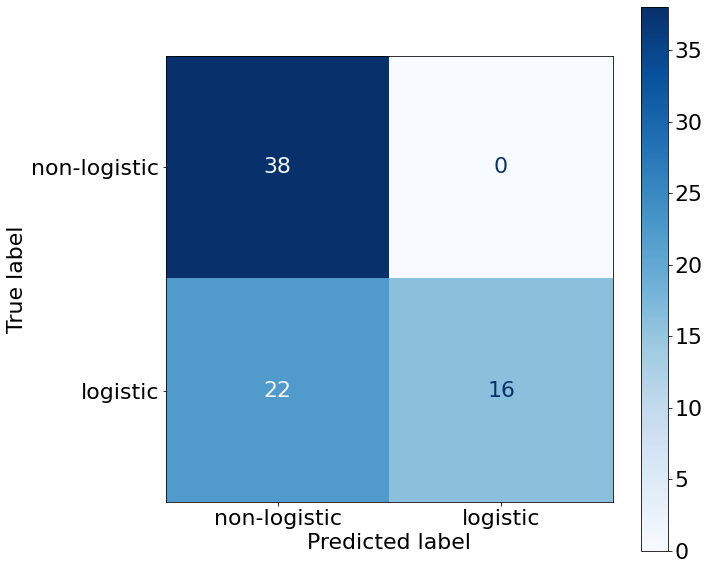

In [312]:
labels = ['non-logistic', 'logistic']

fig, ax = plt.subplots(figsize=(10, 10))

plt.rcParams.update({'font.size': 22})

matrix = plot_confusion_matrix(rfc, new_test_data, new_y_test, cmap=plt.cm.Blues, ax=ax, values_format="")

ax.set_xticklabels(labels)
ax.set_yticklabels(labels)

plt.show()

In [301]:
logistic_index = np.where(y_test == 1.0)[0]
non_logistic_index = np.where(y_test == 0.0)[0]
accuracy = []
for i in range(1, 101):
    pca = PCA(n_components = i)
    pca.fit(x_train_norm)
    x_train_pca = pca.transform(x_train_norm)
    x_test_pca = pca.transform(x_test_norm)
    
    new_test_data = []
    for i in logistic_index:
        new_test_data.append(x_test_pca[i])
        if (len(new_test_data) == np.count_nonzero(y_test)):
            break
    for i in non_logistic_index:
        new_test_data.append(x_test_pca[i])
        if (len(new_test_data) == 2 * np.count_nonzero(y_test)):
            break
    new_test_data = np.array(new_test_data)
    
    new_y_test = []
    for i in range(0, np.count_nonzero(y_test)):
        new_y_test.append(1.0)
    for i in range(0, np.count_nonzero(y_test)):
        new_y_test.append(0.0)
    new_y_test = np.array(new_y_test)

    rfc = RandomForestClassifier()
    rfc.fit(x_train_pca, y_train)
    y_predict = rfc.predict(new_test_data)
    accuracy.append(metrics.accuracy_score(new_y_test, y_predict))

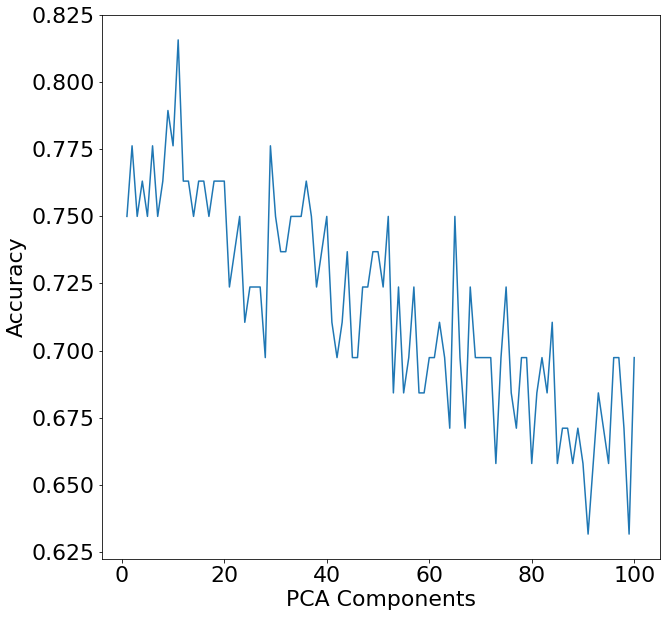

In [302]:
fig, ax = plt.subplots(figsize=(10, 10))
plt.plot(np.arange(1, 101), accuracy)
plt.xlabel("PCA Components")
plt.ylabel("Accuracy")
plt.show()

**What if our test data has more logistic posts then non-logistic posts (which is a drastically different type compared to the training data)?**

In [313]:
pca = PCA(n_components = 32)
pca.fit(x_train_norm)
x_train_pca = pca.transform(x_train_norm)
x_test_pca = pca.transform(x_test_norm)

new_test_data = []
for i in logistic_index:
    new_test_data.append(x_test_pca[i])
    if (len(new_test_data) == np.count_nonzero(y_test)):
        break
for i in non_logistic_index:
    new_test_data.append(x_test_pca[i])
    if (len(new_test_data) == int(1.5 * np.count_nonzero(y_test))):
        break
new_test_data = np.array(new_test_data)

new_y_test = []
for i in range(0, np.count_nonzero(y_test)):
    new_y_test.append(1.0)
for i in range(0, int(0.5 * np.count_nonzero(y_test))):
    new_y_test.append(0.0)
new_y_test = np.array(new_y_test)

rfc = RandomForestClassifier()
rfc.fit(x_train_pca, y_train)
y_predict = rfc.predict(new_test_data)
print("Accuracy:",metrics.accuracy_score(new_y_test, y_predict))

Accuracy: 0.6666666666666666


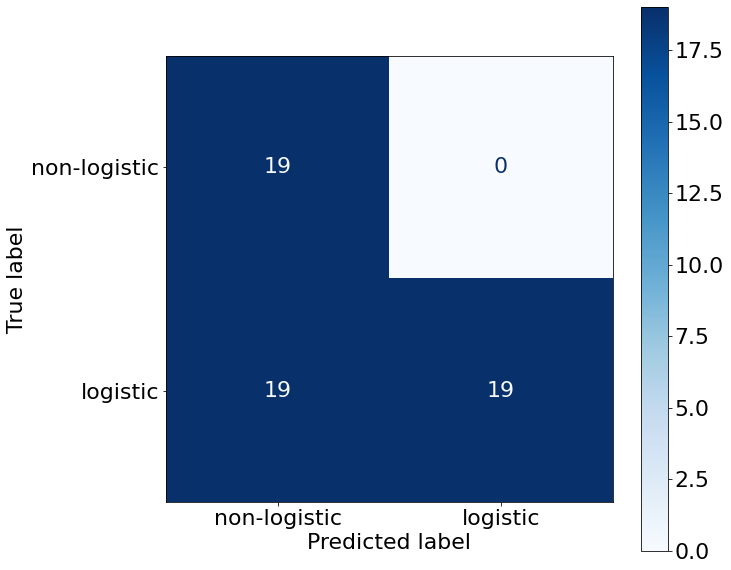

In [314]:
labels = ['non-logistic', 'logistic']

fig, ax = plt.subplots(figsize=(10, 10))

plt.rcParams.update({'font.size': 22})

matrix = plot_confusion_matrix(rfc, new_test_data, new_y_test, cmap=plt.cm.Blues, ax=ax, values_format="")

ax.set_xticklabels(labels)
ax.set_yticklabels(labels)

plt.show()

In [305]:
logistic_index = np.where(y_test == 1.0)[0]
non_logistic_index = np.where(y_test == 0.0)[0]
accuracy = []
for i in range(1, 101):
    pca = PCA(n_components = i)
    pca.fit(x_train_norm)
    x_train_pca = pca.transform(x_train_norm)
    x_test_pca = pca.transform(x_test_norm)
    
    new_test_data = []
    for i in logistic_index:
        new_test_data.append(x_test_pca[i])
        if (len(new_test_data) == np.count_nonzero(y_test)):
            break
    for i in non_logistic_index:
        new_test_data.append(x_test_pca[i])
        if (len(new_test_data) == int(1.5 * np.count_nonzero(y_test))):
            break
    new_test_data = np.array(new_test_data)
    
    new_y_test = []
    for i in range(0, np.count_nonzero(y_test)):
        new_y_test.append(1.0)
    for i in range(0, int(0.5 * np.count_nonzero(y_test))):
        new_y_test.append(0.0)
    new_y_test = np.array(new_y_test)

    rfc = RandomForestClassifier()
    rfc.fit(x_train_pca, y_train)
    y_predict = rfc.predict(new_test_data)
    accuracy.append(metrics.accuracy_score(new_y_test, y_predict))

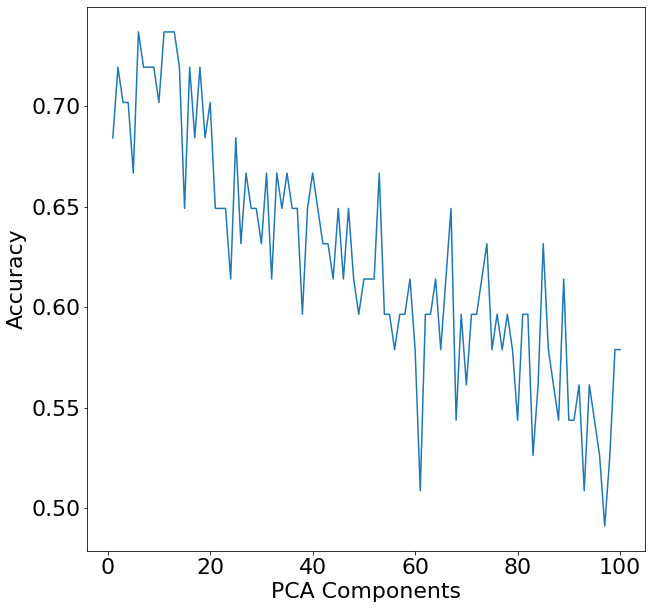

In [306]:
fig, ax = plt.subplots(figsize=(10, 10))
plt.plot(np.arange(1, 101), accuracy)
plt.xlabel("PCA Components")
plt.ylabel("Accuracy")
plt.show()

**What if our test data has MUCH more logistic posts then non-logistic posts (which is a drastically different type compared to the training data)?**

In [315]:
pca = PCA(n_components = 32)
pca.fit(x_train_norm)
x_train_pca = pca.transform(x_train_norm)
x_test_pca = pca.transform(x_test_norm)

new_test_data = []
for i in logistic_index:
    new_test_data.append(x_test_pca[i])
    if (len(new_test_data) == np.count_nonzero(y_test)):
        break
for i in non_logistic_index:
    new_test_data.append(x_test_pca[i])
    if (len(new_test_data) == int(1.1 * np.count_nonzero(y_test))):
        break
new_test_data = np.array(new_test_data)

new_y_test = []
for i in range(0, np.count_nonzero(y_test)):
    new_y_test.append(1.0)
for i in range(0, int(0.1 * np.count_nonzero(y_test))):
    new_y_test.append(0.0)
new_y_test = np.array(new_y_test)

rfc = RandomForestClassifier()
rfc.fit(x_train_pca, y_train)
y_predict = rfc.predict(new_test_data)
print("Accuracy:",metrics.accuracy_score(new_y_test, y_predict))

Accuracy: 0.5365853658536586


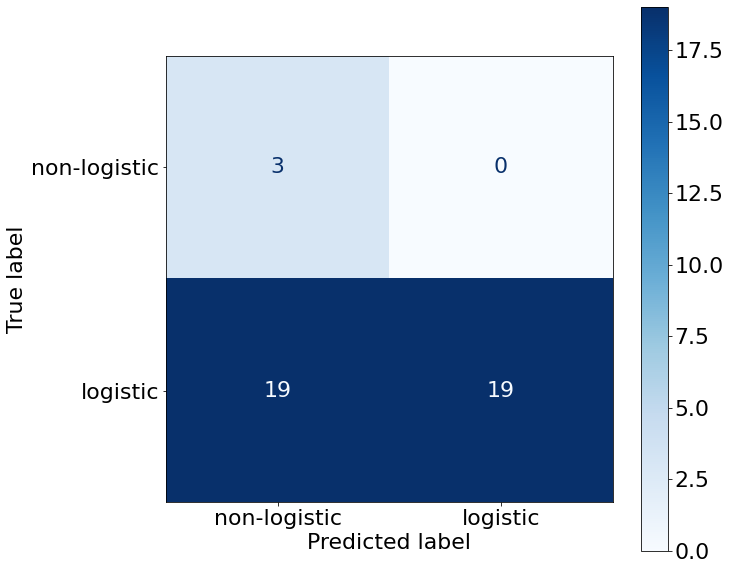

In [316]:
labels = ['non-logistic', 'logistic']

fig, ax = plt.subplots(figsize=(10, 10))

plt.rcParams.update({'font.size': 22})

matrix = plot_confusion_matrix(rfc, new_test_data, new_y_test, cmap=plt.cm.Blues, ax=ax, values_format="")

ax.set_xticklabels(labels)
ax.set_yticklabels(labels)

plt.show()

In [307]:
logistic_index = np.where(y_test == 1.0)[0]
non_logistic_index = np.where(y_test == 0.0)[0]
accuracy = []
for i in range(1, 101):
    pca = PCA(n_components = i)
    pca.fit(x_train_norm)
    x_train_pca = pca.transform(x_train_norm)
    x_test_pca = pca.transform(x_test_norm)
    
    new_test_data = []
    for i in logistic_index:
        new_test_data.append(x_test_pca[i])
        if (len(new_test_data) == np.count_nonzero(y_test)):
            break
    for i in non_logistic_index:
        new_test_data.append(x_test_pca[i])
        if (len(new_test_data) == int(1.1 * np.count_nonzero(y_test))):
            break
    new_test_data = np.array(new_test_data)
    
    new_y_test = []
    for i in range(0, np.count_nonzero(y_test)):
        new_y_test.append(1.0)
    for i in range(0, int(0.1 * np.count_nonzero(y_test))):
        new_y_test.append(0.0)
    new_y_test = np.array(new_y_test)

    rfc = RandomForestClassifier()
    rfc.fit(x_train_pca, y_train)
    y_predict = rfc.predict(new_test_data)
    accuracy.append(metrics.accuracy_score(new_y_test, y_predict))

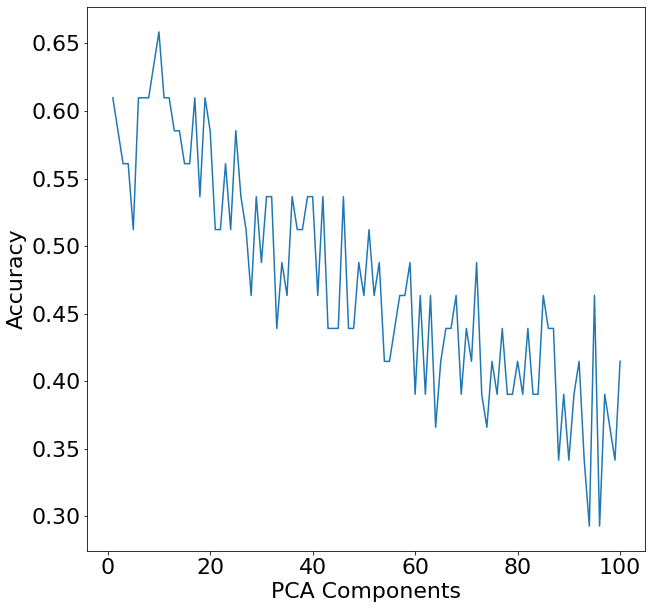

In [308]:
fig, ax = plt.subplots(figsize=(10, 10))
plt.plot(np.arange(1, 101), accuracy)
plt.xlabel("PCA Components")
plt.ylabel("Accuracy")
plt.show()

The following conclusions can be drawn from the above experiments:
1. The ML process is NOT great, the algorithm gets high accuracy simply because of the highly biased training data
2. The optimal number of PCA components is NOT 32 as suggested in Justin's thesis, but a number that is slightly above 10